In [3]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
#%matplotlib inline

In [11]:
avail = pd.read_csv('Data/availability.csv', encoding='latin_1')
rate = pd.read_csv('Data/ratings.csv', encoding='latin_1')
number = pd.read_csv('Data/number.csv', encoding='latin_1')
book = pd.read_csv('Data/books.csv', encoding='latin_1')

In [12]:
rate = list(rate)
print(rate)

['4.56', 'Unnamed: 1', '4.47', '4.41', '0.4', '4.78', '3.69', '7.3', '4.38', '4.38.1', '4.22', '4.22.1', '4.38.2', '4.2', '3.43', '3.88', '4.07', '3.9', '3.83', '3.87', '3.92', '3.94', '21', '4.49', '4.49.1', '4.35', '4.49.2', '0.1', '4.5', '4.49.3', '3.61', '3.89', '3.7', '3.97', '3.87.1', '4.33', '3.48', '3.75', '3.6', '4.07.1', '4.17', '3.56', 'Unnamed: 42', '3.83.1', '3.83.2', '3.83.3', 'Unnamed: 46', '4.16', '3.83.4', '4.43', '3.95', '4.15', '4.24', '4.33.1', '4.22.2', '3.91', '4.22.3', '4.22.4', '3.73', 'Unnamed: 59', '3.94.1', '3.75.1', '4.45', '3.7.1', '3.98', '3.28', '4.45.1', '3.88.1', '3.82', '3.75.2', '3.83.5', '3.9.1', '3.87.2', '4', 'Unnamed: 74', '3.87.3', '3.92.1', '3.85', '4.35.1', '4.35.2', '4.28', '31', '3.79', '3.49', '3.5', '3.62', '3.52', '4.27', '3.55', '3.89.1', 'Unnamed: 90', '4.09', '4.08', '3.65', '4.04', 'Unnamed: 95', '4.04.1', '3.89.2', 'Unnamed: 98', '4.04.2']


In [13]:
for r in range(0,len(rate)):                    # If unamed it's initialised to 0.0 and if len > 4 it's reduced
    if (rate[r].startswith("Unnamed:")):
        rate[r] = '0.00'
    if(len(rate[r]) > 4):                       #If it's 2.3.4 we make it to 2.3
        new = rate[r]
        res = new[0:4]
        rate[r] = res
print(rate)       

['4.56', '0.00', '4.47', '4.41', '0.4', '4.78', '3.69', '7.3', '4.38', '4.38', '4.22', '4.22', '4.38', '4.2', '3.43', '3.88', '4.07', '3.9', '3.83', '3.87', '3.92', '3.94', '21', '4.49', '4.49', '4.35', '4.49', '0.1', '4.5', '4.49', '3.61', '3.89', '3.7', '3.97', '3.87', '4.33', '3.48', '3.75', '3.6', '4.07', '4.17', '3.56', '0.00', '3.83', '3.83', '3.83', '0.00', '4.16', '3.83', '4.43', '3.95', '4.15', '4.24', '4.33', '4.22', '3.91', '4.22', '4.22', '3.73', '0.00', '3.94', '3.75', '4.45', '3.7.', '3.98', '3.28', '4.45', '3.88', '3.82', '3.75', '3.83', '3.9.', '3.87', '4', '0.00', '3.87', '3.92', '3.85', '4.35', '4.35', '4.28', '31', '3.79', '3.49', '3.5', '3.62', '3.52', '4.27', '3.55', '3.89', '0.00', '4.09', '4.08', '3.65', '4.04', '0.00', '4.04', '3.89', '0.00', '4.04']


In [14]:
for r in range(0,len(rate)):
    if (rate[r].endswith(".")):                 #If it ends with . we delete it
        new = rate[r]
        tot = len(new)
        rate[r] = new[0:tot-1]

In [15]:
for r in range(0,100):                           # If any value > than 5
    new = float(rate[r])
    if( new > 5.0):
        rate[r] = '5.00'

In [16]:
avail = list(avail)                           
print(avail)

['1', '0', 'f', 't', 't.1', 'f.1', '0.1', '1.1', '1.2', '0.2', '0.3', 'f.2', '0.4', '1.3', '0.5', 't.2', 't.3', 't.4', 'f.3', 'f.4', 'f.5', 't.5', 't.6', 't.7', 't.8', 't.9', 'f.6', 'f.7', '0.6', 'f.8', 't.10', '1.4', '1.5', 't.11', 't.12', 'f.9', '1.6', 't.13', '1.7', '1.8', '1.9', 't.14', 't.15', 't.16', 't.17', 'f.10', '1.10', 'f.11', 'f.12', 'f.13', '1.11', '1.12', 't.18', '1.13', 't.19', 'f.14', 'f.15', '1.14', '1.15', 'f.16', 't.20', 'f.17', 'f.18', 't.21', 't.22', 'f.19', '1.16', '1.17', '1.18', 'f.20', 'f.21', '1.19', '1.20', '1.21', 't.23', '1.22', 'f.22', 'f.23', 't.24', 'f.24', '0.7', 'f.25', 'f.26', 'f.27', 'f.28', 'f.29', '0.8', 'f.30', '1.23', 't.25', '1.24', '1.25', 'f.31', '1.26', 't.26', '1.27', '1.28', 'f.32', 't.27', '0.9']


In [17]:
for r in range(0,100):
    if avail[r].startswith("1") or avail[r].startswith("t"):      #If it start's with 1/t
        avail[r] = 't'
    if avail[r].startswith("0") or avail[r].startswith("f"):      #If it start's with 0/f
        avail[r] = 'f'

In [18]:
print (avail)

['t', 'f', 'f', 't', 't', 'f', 'f', 't', 't', 'f', 'f', 'f', 'f', 't', 'f', 't', 't', 't', 'f', 'f', 'f', 't', 't', 't', 't', 't', 'f', 'f', 'f', 'f', 't', 't', 't', 't', 't', 'f', 't', 't', 't', 't', 't', 't', 't', 't', 't', 'f', 't', 'f', 'f', 'f', 't', 't', 't', 't', 't', 'f', 'f', 't', 't', 'f', 't', 'f', 'f', 't', 't', 'f', 't', 't', 't', 'f', 'f', 't', 't', 't', 't', 't', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 't', 't', 'f', 't', 't', 't', 't', 'f', 't', 'f']


In [19]:
num = list(number)
print(num)

['0', '1', 'Unnamed: 2', '3', '4', '5', '6', '7', '8', 'Unnamed: 9', '10', '11', '12', '13', 'Unnamed: 14', '15', '16', '17', '18', '19', '20', 'Unnamed: 21', '22', '23', 'Unnamed: 24', '25', '26', '27', '28', '29', '30', 'Unnamed: 31', '32', '33', '34', 'Unnamed: 35', '36', '37', '38', '39', '40', 'Unnamed: 41', '42', '43', 'Unnamed: 44', '45', '46', '47', '48', '49', 'Unnamed: 50', '51', '52', '53', '54', 'Unnamed: 55', '56', '57', 'Unnamed: 58', '59', '60', '61', '62', '63', '64', '65', '66', 'Unnamed: 67', '68', '69', '70', '71', '72', '73', 'Unnamed: 74', '75', '76', '77', '78', '79', '80', '81', '82', 'Unnamed: 83', '84', '85', '86', '87', '88', '89', '90', '91', '92', 'Unnamed: 93', '94', '95', '96', '97', '98', '99']


In [20]:
for r in range(0,len(num)):
    if(num[r].startswith("Unnamed:")):            #If it's odd new ID is created
        if(r%2 != 0):
           # print(num[r])
            num[r] = str(r)  
print(num)

['0', '1', 'Unnamed: 2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', 'Unnamed: 14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Unnamed: 24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', 'Unnamed: 44', '45', '46', '47', '48', '49', 'Unnamed: 50', '51', '52', '53', '54', '55', '56', '57', 'Unnamed: 58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', 'Unnamed: 74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [21]:
delv = []
for r in range(0,len(num)):                              #To find even ID 
    if(str(num[r]).startswith("Unnamed:")):
        delv.append(num[r])
print(delv)
    

['Unnamed: 2', 'Unnamed: 14', 'Unnamed: 24', 'Unnamed: 44', 'Unnamed: 50', 'Unnamed: 58', 'Unnamed: 74']


In [22]:
for r in num:                                          #To delete it
    if(r in delv):
        num.remove(r)
print(num)

['0', '1', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '45', '46', '47', '48', '49', '51', '52', '53', '54', '55', '56', '57', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [97]:
book = list(book)
print(book)

['Treasure Island', 'Kahlil Gibran: His Life and World', 'The Broken Wings', 'I am Charlotte Simmons', 'Wrinkles in Time', 'Unnamed: 5', 'One Hundred Years of Solitude', 'The Portrait of a Lady', 'Unnamed: 8', 'The New York Trilogy', 'One Hundred Years of Solitude.1', 'The Alchemist', 'Wrinkles in Time.1', 'The Broken Wings.1', 'Unnamed: 14', 'One Hundred Years of Solitude.2', 'The Alchemist.1', 'The Da Vinci Code', 'One Hundred Years of Solitude.3', 'Deception Point', 'Unnamed: 20', 'The New York Trilogy.1', 'Unnamed: 22', 'Wrinkles in Time.2', 'Unnamed: 24', 'The Portrait of a Lady.1', 'Deception Point.1', 'The New York Trilogy.2', 'Unnamed: 28', 'Treasure Island.1', 'Wrinkles in Time.3', 'The New York Trilogy.3', 'Unnamed: 32', 'Kahlil Gibran: His Life and World.1', 'I am Charlotte Simmons.1', 'One Hundred Years of Solitude.4', 'Unnamed: 36', 'Deception Point.2', 'The Alchemist.2', 'Wrinkles in Time.4', 'Unnamed: 40', 'The Da Vinci Code.1', 'Unnamed: 42', 'The Portrait of a Lady.2',

In [98]:
res=[]
for r in range(0,len(book)):
    if (book[r].startswith("Unnamed:") and not(str(r) in num)):
        res.append(r)
print (res)        

[14, 24, 58]


In [99]:
new =[]                              #To find if ID exists
for r in range(0,len(book)):
    if(r in res):
        new.append(book[r])
print(new)
for r in book:                      #Deleting if ID not found
    if(r in new):
        book.remove(r)
print(book)


['Unnamed: 14', 'Unnamed: 24', 'Unnamed: 58']
['Treasure Island', 'Kahlil Gibran: His Life and World', 'The Broken Wings', 'I am Charlotte Simmons', 'Wrinkles in Time', 'Unnamed: 5', 'One Hundred Years of Solitude', 'The Portrait of a Lady', 'Unnamed: 8', 'The New York Trilogy', 'One Hundred Years of Solitude.1', 'The Alchemist', 'Wrinkles in Time.1', 'The Broken Wings.1', 'One Hundred Years of Solitude.2', 'The Alchemist.1', 'The Da Vinci Code', 'One Hundred Years of Solitude.3', 'Deception Point', 'Unnamed: 20', 'The New York Trilogy.1', 'Unnamed: 22', 'Wrinkles in Time.2', 'The Portrait of a Lady.1', 'Deception Point.1', 'The New York Trilogy.2', 'Unnamed: 28', 'Treasure Island.1', 'Wrinkles in Time.3', 'The New York Trilogy.3', 'Unnamed: 32', 'Kahlil Gibran: His Life and World.1', 'I am Charlotte Simmons.1', 'One Hundred Years of Solitude.4', 'Unnamed: 36', 'Deception Point.2', 'The Alchemist.2', 'Wrinkles in Time.4', 'Unnamed: 40', 'The Da Vinci Code.1', 'Unnamed: 42', 'The Portra

In [101]:
for r in range(0,len(book)):                                        #If ID found then replace then with -10 book
        if(not(r in  res) and book[r].startswith("Unnamed:")):         
           book[r] = book[r-10]
print(book)

['Treasure Island', 'Kahlil Gibran: His Life and World', 'The Broken Wings', 'I am Charlotte Simmons', 'Wrinkles in Time', 'Unnamed: 95', 'One Hundred Years of Solitude', 'The Portrait of a Lady', 'Unnamed: 98', 'The New York Trilogy', 'One Hundred Years of Solitude.1', 'The Alchemist', 'Wrinkles in Time.1', 'The Broken Wings.1', 'One Hundred Years of Solitude.2', 'The Alchemist.1', 'The Da Vinci Code', 'One Hundred Years of Solitude.3', 'Deception Point', 'The New York Trilogy', 'The New York Trilogy.1', 'The Alchemist', 'Wrinkles in Time.2', 'The Portrait of a Lady.1', 'Deception Point.1', 'The New York Trilogy.2', 'The Da Vinci Code', 'Treasure Island.1', 'Wrinkles in Time.3', 'The New York Trilogy.3', 'The New York Trilogy.1', 'Kahlil Gibran: His Life and World.1', 'I am Charlotte Simmons.1', 'One Hundred Years of Solitude.4', 'Deception Point.1', 'Deception Point.2', 'The Alchemist.2', 'Wrinkles in Time.4', 'Wrinkles in Time.3', 'The Da Vinci Code.1', 'The New York Trilogy.1', 'Th

In [102]:
with open('Data.csv', 'w', newline='') as csvfile:                                                        #New CSV file Data.csv
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)

    data = list(zip(num,book,rate,avail))
    heading = ["ID","BOOK","RATINGS","AVAILABALITY"]
    spamwriter.writerow(heading)
    for row in data:
        row = list(row)
        spamwriter.writerow(row)
print("File Created")


Program completed


In [103]:
df = pd.read_csv("Data.csv")
pd.DataFrame(df)


,ID,BOOK,RATINGS,AVAILABALITY
0,0,Treasure Island,4.56,1
1,1,Kahlil Gibran: His Life and World,0.00,0
2,3,The Broken Wings,4.47,f
3,4,I am Charlotte Simmons,4.41,t
4,5,Wrinkles in Time,0.40,t.1
5,6,Unnamed: 95,4.78,f.1
6,7,One Hundred Years of Solitude,3.69,0.1
7,8,The Portrait of a Lady,5.00,1.1
8,9,Unnamed: 98,4.38,1.2
9,10,The New York Trilogy,4.38,0.2


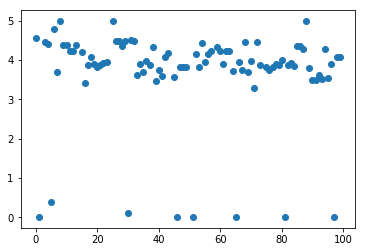

In [67]:
plt.scatter(df['ID'],df['RATINGS'])                      #Scatter plot
plt.show()                                   


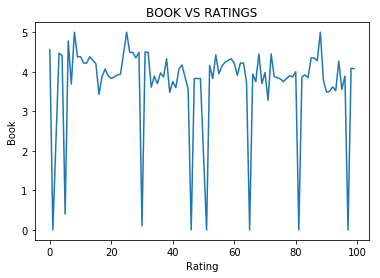

In [80]:
plt.plot(df['ID'],df['RATINGS'])                      #Graph
plt.xlabel('Rating') 
plt.ylabel('Book') 
plt.title('BOOK VS RATINGS')  
plt.show()